#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Procesamiento de Lenguaje Natural (NLP)**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Actividad Semanas 03 y 04**

###**Pre-procesamiento, Matrices Documeto-Término (DTM) y TF-IDF.**

###Alumno: Ricardo Sinuhé Acevedo Baleón

###Matrícula: A01794227

En esta actividad deberás utilizar los datos de tres archivos que se encuentran en Canvas:

*   **amazon_cells_labelled.txt** Contiene 1000 registros de comentarios de usuarios que adquirieron un producto a través de la plataforma de Amazon.

*   **imdb_labelled.txt** Contiene 1000 registros de comentarios que dejaron usuarios sobre palículas y series en la plataforma de IMBD.

*   **yelp_labelled.txt** Contiene 1000 comentarios de usuarios sobre servicios de comida dejados en l aplataforma de Yelp.

Igualmente son los archivos que encuentras en el Machine Learning Repository de la UCI, llamado "Sentiment Labelled Sentences": https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#



In [ ]:
import pandas as pd  
import numpy as np

import nltk
from nltk.corpus import stopwords

import re
import string

In [ ]:
nltk.download('punkt')    # es un tokenizador que ayuda a dividr el texto en enunciados mediante un modelo no-supervisado.
nltk.download('stopwords')    # para tener acceso a "stopwords" en varios idiomas.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Veamos la lista de stopwords que se incluyen de manera predeterminada la suite de librerías de NLTK:

print(len(stopwords.words('english')))
print(stopwords.words('english'))

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [ ]:
# Consideremos la siguiente lista de palabras asociada a negaciones en inglés:

negwords = [ 'no', 'nor', 'not', 'ain', 'aren', "aren't", 'don', "don't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

##**Pregunta - 1:**




Excluye todas las palabras de la lista "negwords" de la lista predeterminada de "stopwords", para definir un nuevo conjunto llamado **mystopwords**, con el cual trabajaremos en esta Actividad:


In [ ]:
################################################################################
# AGREGA AQUÍ TU LÍNEA O LÍNEAS DE CÓDIGO - Pregunta 1:

import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stopwords_english = set(stopwords.words('english'))
negwords = ['no', 'nor', 'not', 'ain', 'aren', "aren't", 'don', "don't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

mystopwords = stopwords_english - set(negwords)


# FIN PARA AGREGAR TU LÍNEA O LÍNEAS DE CÓDIGO.
################################################################################

print(mystopwords)

{'had', 'are', 'against', 'will', 'having', 'before', 'did', 'itself', 'at', 'now', 'd', 'yourself', 'up', 'how', 'during', 'your', 'a', 'out', 'each', 'about', 't', 'was', "she's", 'i', 'do', 'should', 'through', 'more', 'under', 'and', 'from', 'for', 'between', 'but', 'if', 'there', 'why', 'ourselves', 'their', 'once', 'y', 'an', 'or', 'm', 'as', 'into', 'same', 'where', 'theirs', 'this', 'were', 'few', 'doing', 'its', 'whom', 'of', 'own', 'be', "it's", 'both', 'hers', 'such', "you'd", 'him', 'very', 'they', 'over', 'these', 'which', 'can', 'herself', 'then', 're', 'we', 'most', 'who', 'on', 'am', 'll', 'in', 'than', 'because', "you're", 'to', "you've", 'you', 'so', 'ma', 'off', 'his', 'when', 'what', 've', 'down', 'her', 'ours', 'our', 'any', 'does', 'below', 'those', 'above', 'all', 'she', 'while', 'by', 'that', 'again', 'yours', 'has', 's', 'myself', 'with', 'it', 'me', 'is', 'he', 'been', 'have', 'the', 'yourselves', 'himself', "that'll", 'too', 'after', "you'll", 'my', "should'v

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


###**Cargamos los datos de Amazon**

In [ ]:
# Puedes modificar en dado caso la ruta de los archivos:

dfa = pd.read_csv('amazon_cells_labelled.txt', sep='\t', names=['review','label'], header=None, encoding='utf-8')
dfi = pd.read_csv('imdb_labelled.txt', delimiter='\t', names=['review','label'], header=None, encoding='utf-8')
dfy = pd.read_csv('yelp_labelled.txt', sep='\t', names=['review','label'], header=None, encoding='utf-8')


print('Total de registros de Amazon:',dfa.shape)
print('Total de registros de IMBD:',dfi.shape)
print('Total de registros de Yelp:',dfy.shape)

Total de registros de Amazon: (1000, 2)
Total de registros de IMBD: (748, 2)
Total de registros de Yelp: (1000, 2)


La salida anterior esperada es la siguiente:

Total de registros de Amazon: (1000, 2)

Total de registros de IMBD: (748, 2)

Total de registros de Yelp: (1000, 2)

In [ ]:
dfa.head()     # Cada uno de estos data frame está formado de dos columnas, 
               # uno con los comentarios (review) y otro con la etiqueta (label).
               # En particular aquí mostramos en el Amazon:

,review,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


Sin embargo, observa que los registros de IMBD no son los 1000 que se indican en la documentación de estos datos, sino 748. 

En realidad no son datos perdidos, sino que varios de ellos fueron capturados errónamente como uno solo. En ocasiones, la gran cantidad de caracteres especiales existentes en la actualidad generan este tipo de problemas.

Por ejemplo, observa la salida siguiente y cómo el registro de índice 19 tiene una gran cantidad de registros conjuntados como uno solo. Es decir, se conjuntó indebidamente información de las dos columnas del data frame.



In [ ]:
dfi.values.tolist()[17:21]

[["I'll put this gem up against any movie in terms of screenplay, cinematography, acting, post-production, editing, directing, or any other aspect of film-making.  ",
  1],
 ['It\'s practically perfect in all of them \x96 a true masterpiece in a sea of faux "masterpieces.  ',
  1],
 [' The structure of this film is easily the most tightly constructed in the history of cinema.  \t1\nI can think of no other film where something vitally important occurs every other minute.  \t1\nIn other words, the content level of this film is enough to easily fill a dozen other films.  \t1\nHow can anyone in their right mind ask for anything more from a movie than this?  \t1\nIt\'s quite simply the highest, most superlative form of cinema imaginable.  \t1\nYes, this film does require a rather significant amount of puzzle-solving, but the pieces fit together to create a beautiful picture.  \t1\nThis short film certainly pulls no punches.  \t0\nGraphics is far from the best part of the game.  \t0\nThis is

Además, se observa que cada comentario (review) debe estar separado de su evaluación (label) por un tabulador "\t" y después separado del siguiente registro por un salto de línea "\n".

Usaremos esta información para separar de manera adecuada estos registros del conjunto de IMBD.

##**Pregunta - 2:**

En este ejercicio deberás corregir este problema que tienen los comentarios de IMBD, del cual se registran 748 comentarios, cuando deben ser 1000.

Como cada data frame tiene 2 columnas, el comentario y la evaluación, en algunas ocasiones el valor numérico de la evaluación se toma como parte del comentario y esto empieza a generar dichos errores. 

El problema se puede intentar resolver de varias formas, sin embargo puedes al menos seguir los siguientes pasos para obtener de nuevo los 1000 comentarios en IMBD:


1.   Conjuntar en un solo string cada comentario (review) con su evaluación (label), separados por un tabulador "\t". Toma en cuenta que ambos deben ser del tipo de dato string.

2.   Separa cada uno de estos string con el método split() y con respecto al salto de línea "\n". Esto te debe llevar a que cada registro es ahora una lista con un solo string que contiene el comenario (review), seguido del tabulador y de la etiqueta (label). O bien, tienes una lista de varios string, donde cada string es un review, seguido por el tabulador y su label.

3.   Ahora separa cada cada uno de los string del paso anterior con respecto al tabulador "\t", para ya tener separados ahora sí, todos los comentarios (review) de su evaluación (label). 

4.   Agrega cada uno de estos nuevos comentarios (review) y etiquetas (label) a la nueva lista que llamamos "newdfi".

El número de elementos de la nueva lista "newdfi" debe de ser de 1000, donde cada elemento está formado a su vez por una lista de dos elementos, donde el primero es un string del comentario (review) y el segundo es un número entero de la etiqueta (label).

Básicamente la idea fue conjuntar de nuevo la información de ambas columnas, para separarlas de nuevo de la manera adecuada.






In [ ]:
################################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 2:
data_imdb = open('imdb_labelled.txt', encoding='utf-8').read().split('\n')
newdfi = []

for line in data_imdb:
    parts = line.split('\t')  # Separar cada línea por el tabulador
    if len(parts) == 2:  # Asegurarse de tener ambos comentarios y etiquetas
        review = parts[0].strip()  # Eliminar espacios en blanco alrededor del comentario
        label = int(parts[1])  # Convertir la etiqueta en un número entero
        newdfi.append([review, label])  # Agregar el comentario y la etiqueta a la nueva lista
# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
################################################################################
print(len(newdfi))  # Verificar el número de elementos en la nueva lista

1000


In [ ]:
# Verificando los registros donde habíamos detectado uno de los problemas:
newdfi[17:21]

[["I'll put this gem up against any movie in terms of screenplay, cinematography, acting, post-production, editing, directing, or any other aspect of film-making.",
  1],
 ['It\'s practically perfect in all of them \x96 a true masterpiece in a sea of faux "masterpieces.',
  1],
 ['" The structure of this film is easily the most tightly constructed in the history of cinema.',
  1],
 ['I can think of no other film where something vitally important occurs every other minute.',
  1]]

En particular la salida anterior debe ser algo como lo siguiente:

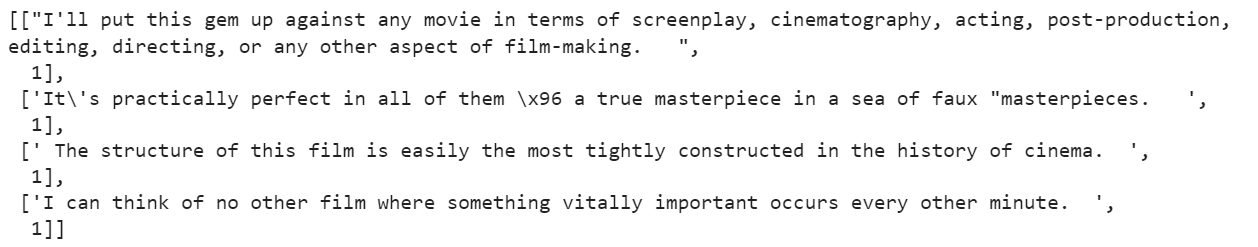

Transformemos en data frame la lista recién generada de los comentarios (review) y evaluaciones (label) del conjunto de evaluaciones de películas IMBD:

In [ ]:
dfii = pd.DataFrame(newdfi, columns=['review','label'])

dfii.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  1000 non-null   object
 1   label   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
# y concatenamos los tres conjuntos para tener finalmente los 3000 registros:

df = pd.concat([dfa, dfii, dfy], ignore_index=True)   # Tienes que usar el "ignore_index", de lo contrario reincia cada 
                                                      # vez de 0 a 999 los índices.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  3000 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


La salida esperada anterior debe ser semajante a los siguiente:

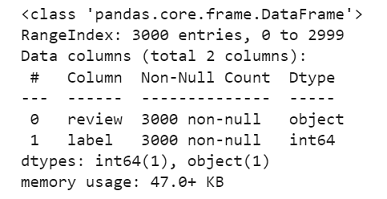

In [ ]:
df['label'].value_counts()   # Recordemos que tenemos un 50% de comentarios positivos y de negativos.

0    1500
1    1500
Name: label, dtype: int64

In [ ]:
df.head()

,review,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


##**Pregunta - 3:**

Sabemos que existen comentarios muy diversos. Por ejemplo, observa los registros 1125 y 1788, cuyas salidas deben de ser 10/10. De los 3000, dos de los comentarios fueron simplemente de esta forma.

Cuando apliques el proceso de limpieza en la pregunta 4, como solo consideraremos caracteres alfabéticos, estos dos registros quedarán vacíos.

En particular ¿cómo tratarías estos dos comentarios? ¿Simplemente los descartarías? ¿Los incluirías haciendo algún ajuste particular? ¿Alguna otra decisión que consideres adecuada para estos dos casos? 

**Incluye a continuación tus comentarios sobre la decisión que tomarías para el tratamiento en particular de estos dos registros, 1125 y 1788. Justifica tu respuesta.**

In [ ]:
df.iloc[1788,:]   # verificando tu salida

review    10/10
label         1
Name: 1788, dtype: object

########################################################
##### **AGREGA AQUÍ TUS COMENTARIOS - Pregunta 3:**
Dado que los registros 1125 y 1788 contienen únicamente la calificación "10/10", que no aporta información relevante sobre el contenido del comentario, se podría considerar eliminarlos durante el proceso de limpieza de datos.

La justificación detrás de esta decisión es que estos registros no proporcionan ninguna opinión o descripción significativa sobre la película, lo cual es el objetivo principal del análisis de sentimientos. Al eliminar estos registros, nos aseguramos de que los comentarios restantes sean más representativos y útiles para el análisis.

Sin embargo, antes de descartar estos registros, sería recomendable analizar el conjunto de datos en su totalidad para evaluar si existen patrones o características específicas que indiquen que estos registros puedan ser valiosos o relevantes de alguna manera. Si no se encuentra ninguna evidencia que sugiera su utilidad, eliminarlos sería la opción más apropiada para mantener la calidad y la coherencia de los datos.
##### **FIN PARA AGREGAR TUS COMENTARIOS**
#########################################################

In [ ]:
 # Separamos la información: 
 #     La "X" serán los datos de entrada, los comentarios.
 #     La "Y" será la variable de salida, la evaluación.
 # Ambos, X y Y son "Series" 

X = df.review     # Serie de strings
Y = df.label      # Serie de enteros 0s y 1s

assert X.shape == (3000,)           # verificando que tenemos la dimensiones esperadas.
assert Y.shape == (3000,)

##**Pregunta - 4:**

**En esta etapa deberás llevar a cabo el procesamiento, limpieza y tokenización de los comentarios de texto.**

Deberás de incluir los procesos que se indicarán a continuación, aunque no necesariament deben ser en este orden. De hecho deberás estar revisando la salida de algunos de los registros para que determines cual consideras podría ser el mejor orden de estos pasos.

La incluiremos en una función llamada "clean_tok()" ya que es la tokenización y limpieza básica de cada uno de los 3000 comentarios. La entrada de esta función son cada uno de estos 3000 strings/comentarios.

Lo que nos regresa "clean_tok()" es una lista de tokens/strings ya simplificados de cada comentario de entrada.

Los pasos a incluir son los siguientes (repito, tú deberás determinar el orden de ellos, aquí se incluyen en orden alfabético):

*   **Caracteres alfabéticos:** Solo considerar caracteres alfabéticos. Por lo tanto, deberán ser eliminados signos de puntuación, caracteres especiales y números.

*   **Longitud mayor a 1:** Se deben considerar solamente tokens de longitud mayor a 1.

*   **Minúsculas:** Simplificar todo a minúsculas.

*   **Stopwords:** Eliminar las stopwords.

*   **Tokenización:** Cada comentario queda tokenizado por palabras, o cadena de caracteres alfabéticos.

Por ejemplo, si el primer comentario de X fuera el string 'All you need is love!', lo que nos regresaría clean_tok() sería la lista de strings ['need', 'love'] que llamaremos "tokens".

In [ ]:

  ##############################################################################
  # AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 4:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

def clean_tok(comment):
    # Eliminar signos de puntuación y caracteres especiales
    comment = comment.translate(str.maketrans("", "", string.punctuation))

    # Convertir a minúsculas
    comment = comment.lower()

    # Tokenización por palabras
    tokens = word_tokenize(comment)

    # Eliminar palabras de longitud 1 y stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [token for token in tokens if len(token) > 1 and token not in stop_words]

    # Separar "minutesmajor" en "minutes" y "major"
    tokens = [token.replace("minutesmajor", "minutes major") for token in tokens]
    tokens = [subtoken for token in tokens for subtoken in token.split()]

    return tokens

  # FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
  ##############################################################################

In [ ]:
# Aplicamos el proceso de limpieza y tokenización:
Xcleantok = [clean_tok(x) for x in X]


Veamos los primeros comentarios.

En particular observa si "minutes" y "major" están como dos tokens separados en el cuarto comentario. De nos ser así, si aparecen juntos como un solo token, debes revisar tu proceso de limpieza anterior, porque esto significa que pueden existir otros muchos casos que nos llevan a esta salida no deseada. Trata de determinar el origen de este problema (y solo en caso de que te haya aparecido como un solo token "minutesmajor", en el cuarto comentario).


In [ ]:
for x in Xcleantok[0:5]:
    print(x)

['way', 'plug', 'us', 'unless', 'go', 'converter']
['good', 'case', 'excellent', 'value']
['great', 'jawbone']
['tied', 'charger', 'conversations', 'lasting', '45', 'minutes', 'major', 'problems']
['mic', 'great']


##**Pregunta - 5:**

Esta pregunta es abierta y podrás incluir todos aquellos procesos de limpieza adicionales que desees.

Por ejemplo, puedes decidir aplicar algunos procesos (regex) para simplificar caracteres que aparecen repetidos más de dos veces, o bien simplificar algunas conjugaciones de verbos regulares para no incluir terminaciones en "s", "ed" o "ing". Puedes también decidir aplicar alguna de las técnicas de stemming o de lemmatization, etc.

NOTA: Deberás aplicar al menos dos procesos de limpieza o normalización adicionales en esta función que llamamos simplemente clean_doc().

La entrada son cada una de las listas con los comentarios tokenizados de Xcleantok y la salida es una lista de tokens simplficados/normalizados con el nombre de "tokens". En dado caso, algunos de los comentarios tokenizados pudieran no surgir cambio alguno bajo esta función.

Recuerda que el objetivo de esta función "clean_doc()" es tener datos más limpios para el proceso de entrenamiento con los algoritmos de aprendizaje automático que se realizarán en las últimas preguntas.

Puedes inspeccionar de manera aleatoria algunos de los 3000 registros para determinar qué procesos de limpieza adicionales incluir.

In [ ]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 5:

# Aquí puedes incluir las librerías, paquetes o líneas de código necesarias para
# el proceso de limpieza adicional de esta pregunta:

#PRIMER MODELO DE LIMPIEZA
import re
import random
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

def clean_doc(tokens):
    # Eliminar caracteres repetidos más de dos veces
    tokens = [re.sub(r'(.)\1+', r'\1\1', token) for token in tokens]

    # Simplificar conjugaciones de verbos regulares
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    # Aplicar lematización
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return tokens
# Seleccionar aleatoriamente algunos comentarios
random_comments = random.sample(Xcleantok, 5)
# Aplicar clean_doc() a cada comentario seleccionado
for comment in random_comments:
    cleaned_tokens = clean_doc(comment)
    print(f"Original: {comment}")
    print(f"Limpio: {cleaned_tokens}")
    print()

[nltk_data] Downloading package wordnet to /root/nltk_data...


Original: ['breakfast', 'perpared', 'great', 'beautiful', 'presentation', 'giant', 'slices', 'toast', 'lightly', 'dusted', 'powdered', 'sugar']
Limpio: ['breakfast', 'perpar', 'great', 'beauti', 'present', 'giant', 'slice', 'toast', 'lightli', 'dust', 'powder', 'sugar']

Original: ['awful', 'dialogue', 'hopeless', 'overacting', 'everyone', 'gets', 'shot', 'top', 'real', 'waste', 'space', 'time']
Limpio: ['aw', 'dialogu', 'hopeless', 'overact', 'everyon', 'get', 'shot', 'top', 'real', 'wast', 'space', 'time']

Original: ['campy', 'sort', 'film', 'thats', 'joy', 'watch']
Limpio: ['campi', 'sort', 'film', 'that', 'joy', 'watch']

Original: ['art', 'style', 'appearance', 'crayonpencil', 'drawings', 'wonderfully', 'colorful', 'fanciful']
Limpio: ['art', 'style', 'appear', 'crayonpencil', 'draw', 'wonder', 'color', 'fanci']

Original: ['left', 'frustrated']
Limpio: ['left', 'frustrat']



In [ ]:
# Imprime los resultados del nuevo modelo de limpieza de datos
cleaned_tokens = clean_doc(comment)

print("Tokens antes de la limpieza:\n")
print(comment)

print("\nTokens después de la limpieza:\n")
print(cleaned_tokens)
  #return tokens
  # FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
  ##############################################################################

Tokens antes de la limpieza:

['left', 'frustrated']

Tokens después de la limpieza:

['left', 'frustrat']


In [ ]:
import re
from nltk.stem import WordNetLemmatizer

def clean_doc_v2(tokens):
    # Eliminar caracteres repetidos más de dos veces
    cleaned_tokens = [re.sub(r'(.)\1{2,}', r'\1\1', token) for token in tokens]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    cleaned_tokens = [lemmatizer.lemmatize(token) for token in cleaned_tokens]

    return cleaned_tokens

In [ ]:
# Aplicar el primer modelo de limpieza a los tokens
Xcleantok_v1 = [clean_doc(x) for x in X]

# Aplicar el segundo modelo de limpieza a los tokens del primer modelo
Xcleantok_v2 = [clean_doc_v2(tokens) for tokens in Xcleantok_v1]

# Visualizar los cambios en los primeros 5 comentarios
for i in range(5):
    print(f"Comentario {i+1}:")
    print("Antes:", Xcleantok[i])
    print("Después:", Xcleantok_v2[i])
    print()
  #return tokens

Comentario 1:
Antes: ['way', 'plug', 'us', 'unless', 'go', 'converter']
Después: ['s', 'o', ' ', 't', 'h', 'e', 'r', 'e', ' ', 'i', 's', ' ', 'n', 'o', ' ', 'w', 'a', 'y', ' ', 'f', 'o', 'r', ' ', 'm', 'e', ' ', 't', 'o', ' ', 'p', 'l', 'u', 'g', ' ', 'i', 't', ' ', 'i', 'n', ' ', 'h', 'e', 'r', 'e', ' ', 'i', 'n', ' ', 't', 'h', 'e', ' ', 'u', 's', ' ', 'u', 'n', 'l', 'e', 's', 's', ' ', 'i', ' ', 'g', 'o', ' ', 'b', 'y', ' ', 'a', ' ', 'c', 'o', 'n', 'v', 'e', 'r', 't', 'e', 'r', '.']

Comentario 2:
Antes: ['good', 'case', 'excellent', 'value']
Después: ['g', 'o', 'o', 'd', ' ', 'c', 'a', 's', 'e', ',', ' ', 'e', 'x', 'c', 'e', 'l', 'l', 'e', 'n', 't', ' ', 'v', 'a', 'l', 'u', 'e', '.']

Comentario 3:
Antes: ['great', 'jawbone']
Después: ['g', 'r', 'e', 'a', 't', ' ', 'f', 'o', 'r', ' ', 't', 'h', 'e', ' ', 'j', 'a', 'w', 'b', 'o', 'n', 'e', '.']

Comentario 4:
Antes: ['tied', 'charger', 'conversations', 'lasting', '45', 'minutes', 'major', 'problems']
Después: ['t', 'i', 'e', 'd', '

In [ ]:
# Aplicamos el proceso de limpieza/normalización adicionales:

Xclean = [clean_doc(x) for x in Xcleantok]  

In [ ]:
Xclean[0:5]         # Veamos los primero registros para ver cómo va quedando el resultado.

[['way', 'plug', 'u', 'unless', 'go', 'convert'],
 ['good', 'case', 'excel', 'valu'],
 ['great', 'jawbon'],
 ['tie', 'charger', 'convers', 'last', '45', 'minut', 'major', 'problem'],
 ['mic', 'great']]

##**Pregunta - 6:**

En esta pregunta deberás generar la nube de palabras de cada clase: la de los comentarios positivos y la de los comentarios negativos.

En la primera parte de esta pregunta y a partir del conjunto de comentarios obtenido hasta ahora, Xclean, deberás obtener el string de comentarios positivos llamada "pt" y el de comentarios negativos "nt".

En la parte 2 deberás mostrar las dos nubes de palabras: la nube de palabras de los comentarios positivos y la nube de palabras de los comentarios negativos.

En la parte 3 de este ejercicio deberás incluir tus comentarios de lo que observas de ambas nubes de palabras.

Igualmente deberás incluir los paquetes o librerías necesarios.

In [ ]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 6 - parte 1:
# Crear subconjuntos de comentarios positivos y negativos
positive_comments = [Xcleantok[i] for i in range(len(Xcleantok)) if Y[i] == 1]
negative_comments = [Xcleantok[i] for i in range(len(Xcleantok)) if Y[i] == 0]

# Combinar los tokens de cada subconjunto en un solo texto
pt = ' '.join([' '.join(tokens) for tokens in positive_comments])
nt = ' '.join([' '.join(tokens) for tokens in negative_comments])
# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################

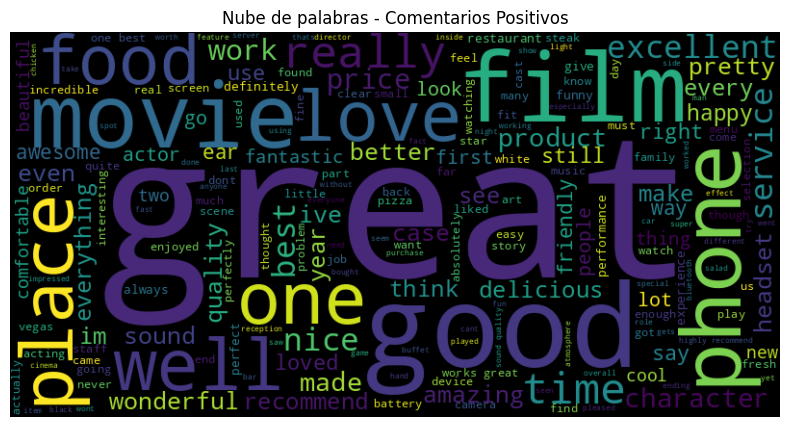

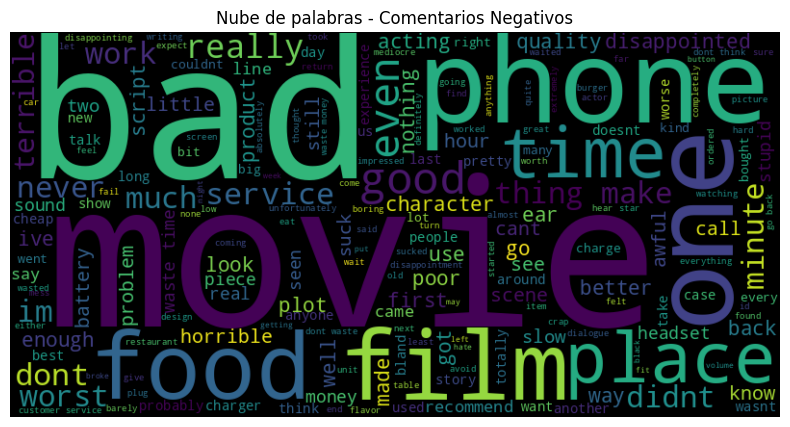

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Crear la nube de palabras de los comentarios positivos
wordcloud_positive = WordCloud(width=800, height=400).generate(pt)

# Crear la nube de palabras de los comentarios negativos
wordcloud_negative = WordCloud(width=800, height=400).generate(nt)

# Mostrar la nube de palabras de los comentarios positivos
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Nube de palabras - Comentarios Positivos')
plt.axis('off')
plt.show()

# Mostrar la nube de palabras de los comentarios negativos
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Nube de palabras - Comentarios Negativos')
plt.axis('off')
plt.show()

######################################################################
###### **AGREGA AQUÍ TUS COMENTARIOS - Pregunta 6 - parte 3:**
Estas nubes de palabras nos muestran las palabras más frecuentes en cada categoría, lo que nos permite tener una idea general del contenido de los comentarios.

Comentarios positivos:

    En la nube de palabras de los comentarios positivos, se observan palabras como "great", "good", "excellent", "love", "best", entre otras. Estas palabras indican una tendencia hacia opiniones positivas y calificaciones favorables. Es común encontrar términos relacionados con aspectos destacados de las películas, como actuaciones, trama, dirección, entre otros.

Comentarios negativos:

    En la nube de palabras de los comentarios negativos, se pueden identificar palabras como "bad", "disappointing", "terrible", "waste", "poor", entre otras. Estas palabras reflejan una inclinación hacia opiniones negativas y evaluaciones desfavorables. Es probable encontrar términos relacionados con aspectos problemáticos de las películas, como actuaciones deficientes, tramas débiles o falta de coherencia en la narrativa.
###### **FIN PARA AGREGAR TUS COMENTARIOS.**
######################################################################

###**Train-Validation-Test**

Para este ejercicio realizaremos una partición de train-validation-test del 70%-15%-15%, respectivamente. 

Obviamente la distribución de esta partición puede ser otro de los hiperparámetros a determinar, pero para fines de este ejercicio consideraremos dichos valores.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(Xclean, Y, train_size=.70, shuffle=True, random_state=1) 
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=.50, shuffle=True, random_state=17)

print('X,y Train:', len(x_train), len(y_train))      # los "x_" son "list" y los "y_" son "Series"
print('X,y Val:', len(x_val), len(y_val))
print('X,y Test', len(x_test), len(y_test))

X,y Train: 2100 2100
X,y Val: 450 450
X,y Test 450 450


###Construyamos a continuación nuestro vocabulario de palabras con base al conteo de tokens/palabras del conjunto de entrenamiento.

In [ ]:
from collections import Counter

In [ ]:
midiccionario = Counter()    

for k in range(len(x_train)):
  midiccionario.update(x_train[k])


print('Longitud del diccionario:', len(midiccionario))  
print('\n(word,frequency):') 
print(midiccionario.most_common(10)) 

Longitud del diccionario: 3345

(word,frequency):
[('good', 160), ('movi', 139), ('great', 138), ('phone', 131), ('film', 125), ('work', 111), ('time', 101), ('like', 100), ('one', 98), ('place', 87)]


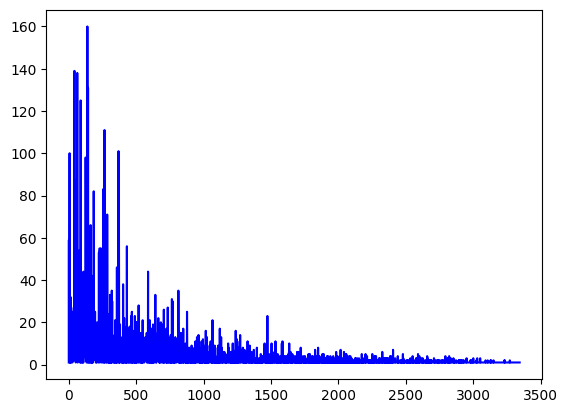

In [ ]:
# Veamos la gráfica de palabras nuestro diccionario con base a la frecuencia de las palabras/tokens:

plt.plot(list(np.arange(len(midiccionario))), list(midiccionario.values()), color='blue')
plt.show()

###Descartemos palabras cuya frecuencia en el conjunto de entrenamiento es muy pequeña:

##**Pregunta - 7:**

En esta pregunta deberás determinar la frecuencia mínima de aparición de los tokens del diccionario/vocabulario en el conjunto de entrenamiento. Es usual que al menos se filtren los tokens de frecuencia 1, ya que usualmente no dan mayor información.

Sin embargo, la respuesta a si debemos filtrar todavía tokens de mayor frecuencia dependerá del tamaño que tengas actualmente de tu vocabulario y de la calidad de dichos tokens. Una manera de determinar dicha calidad de los tokens es con el resultado de los modelos de aprendizaje (regresión logística, random-forest, etc.) que aplicarás en los ejercicios de la última parte de esta Actividad.

Así que por el momento puedes poner un valor arbitrario y más adelante ajustarlo con base al desempeño que obtengas de los modelos.

Sin embargo, debes cuidar que la frecuencia de los tokens no la consideres demasiado grande, que empieces a generar una gran cantidad de comentarios vacíos en tu conjunto de entrenamiento.

Llamaremos "min_freq" a la frecuencia mínima de aparición de un token para considerarlo dentro del vocabulario/diccionario. Debe ser un número entero.

Llamaremos "midicc" al nuevo diccionario que generes con tokens de frecuencia natural (es decir, de conteo) mayor o igual a "min_freq".

In [ ]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 7:
min_freq = 2  # Valor arbitrario de frecuencia mínima

midicc = {word: freq for word, freq in midiccionario.items() if freq >= min_freq}
# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################

print('Nueva longitud del nuevo vocabulario:', len(midicc))
print(list(midicc.items())[0:5])     # veamos algunos elementos del diccionario.

Nueva longitud del nuevo vocabulario: 1454
[('dont', 59), ('fare', 2), ('much', 39), ('better', 38), ('peopl', 23)]


###Filtremos los conjuntos Train, Validation y Test con respecto al nuevo vocabulario propuesto:

In [ ]:
train_x = []
for ss in x_train:
  train_x.append([w for w in ss if w in midicc])

val_x = []
for ss in x_val:
  val_x.append([w for w in ss if w in midicc])

test_x = []
for ss in x_test:
  test_x.append([w for w in ss if w in midicc])

In [ ]:
# Podemos ver algunos de los comentarios de entrenamiento, antes y después 
# de incluir la condición de la frecuencia mínima de ocurrencia de un token:

for k in range(3):
  print('Antes:', x_train[k])
  print('Después:', train_x[k])

Antes: ['costar', 'dont', 'fare', 'much', 'better', 'peopl', 'like', 'morgan', 'freeman', 'jonah', 'hill', 'ed', 'helm', 'wast']
Después: ['dont', 'fare', 'much', 'better', 'peopl', 'like', 'morgan', 'ed', 'wast']
Antes: ['tonight', 'elk', 'filet', 'specialand', 'suck']
Después: ['tonight', 'filet', 'suck']
Antes: ['paid', 'bill', 'tip', 'felt', 'server', 'terribl', 'job']
Después: ['paid', 'bill', 'tip', 'felt', 'server', 'terribl', 'job']


###Obtengamos las matrices de conteo document-term-matrix como matrices dispersas (sparse matrices ). Para ello requerimos que cada comentario esté como un solo string.

In [ ]:
train_x_docs = []
for k in range(len(train_x)):
  train_x_docs.append(' '.join(train_x[k]))

val_x_docs = []
for k in range(len(val_x)):
  val_x_docs.append(' '.join(val_x[k]))

test_x_docs = []
for k in range(len(test_x)):
  test_x_docs.append(' '.join(test_x[k]))



# Verifica que los primeros comentarios de Train están cada uno como un solo string:
for k in range(3):
  print(train_x_docs[k])

dont fare much better peopl like morgan ed wast
tonight filet suck
paid bill tip felt server terribl job


###Ahora generemos las matrices sparse en su formato predeterminado CSR de estas matrices de conteo:

In [ ]:
mivocab = list(midicc.keys())     # Obtenemos nuestro vocabulario de tokens/palabras.

#mivocab.sort()    # Usualmente se ordenan alfabéticamente, pero para visualizar algunos de los valores 
                   # no cero de las matrices, por el momento no lo haremos.



# Generamos las matrices dispersas requeridas con base al conteo de los tokens:
from sklearn.feature_extraction.text import CountVectorizer

countvectorizer = CountVectorizer(vocabulary=mivocab)
train_x_count = countvectorizer.fit_transform(train_x_docs)     
val_x_count = countvectorizer.transform(val_x_docs) 
test_x_count = countvectorizer.transform(test_x_docs)

count_tokens = countvectorizer.get_feature_names_out()
df_countvect = pd.DataFrame(data = train_x_count.toarray(),  columns = count_tokens)  
print(df_countvect.iloc[0:3,6:18])   # veamos las frecuencias de los primeros comentarios.

   morgan  ed  wast  tonight  filet  suck  paid  bill  tip  felt  server  \
0       1   1     1        0      0     0     0     0    0     0       0   
1       0   0     0        1      1     1     0     0    0     0       0   
2       0   0     0        0      0     0     1     1    1     1       1   

   terribl  
0        0  
1        0  
2        1  


In [ ]:
p_sparse = 1 - train_x_count.count_nonzero() / (train_x_count.shape[0] * train_x_count.shape[1])    # Sparsity : Porcentaje de valores de 0.
print('Porcentaje de valores cero de la matriz sparse de entrenamiento: %.1f%%' % (100*p_sparse))

Porcentaje de valores cero de la matriz sparse de entrenamiento: 99.6%


##**Pregunta - 8:**

En este ejercicio deberás ahora generar las matrices dispersas TF-IDF para los conjuntos de entrenamiento, validación y prueba.

Deberás usar el vocabulario "mivocab" para generar dichas matrices.

Dichas matrices las llamaremos "train_x_tfidf", "val_x_tfidf" y "test_x_tfidf".

Deberás agregar además las librerías o módulos necesarios. 

Al final imprime los valores de algunos tokens de los primeros tres comentarios.

In [ ]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 8:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvectorizer = TfidfVectorizer(vocabulary=mivocab)
train_x_tfidf = tfidfvectorizer.fit_transform(train_x_docs)
val_x_tfidf = tfidfvectorizer.transform(val_x_docs)
test_x_tfidf = tfidfvectorizer.transform(test_x_docs)

# Obtener los tokens de los primeros tres comentarios
tokens = tfidfvectorizer.get_feature_names_out()
for i in range(3):
    comment_indices = train_x_tfidf[i].indices
    comment_tokens = [tokens[idx] for idx in comment_indices]
    print("Tokens del comentario", i+1, ":", comment_tokens)
# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################

Tokens del comentario 1 : ['wast', 'ed', 'morgan', 'like', 'peopl', 'better', 'much', 'fare', 'dont']
Tokens del comentario 2 : ['suck', 'filet', 'tonight']
Tokens del comentario 3 : ['job', 'terribl', 'server', 'felt', 'tip', 'bill', 'paid']


##**Pregunta - 9:**

###A continuación, usando Sklearn, deberás aplicar los modelos de regresión logística (lo llamaremos modeloLRcount), ranfom-forest para clasificación (lo llamaremos modeloRFcount) y naive-bayes en su opción MultinomialNB (lo llamaremos modeloNBcount). 

###Deberás de utilizar las matrices de conteo "train_x_count", "val_x_count" y "test_x_count".

###Con el mejor modelo obtenido, se usará el conjunto de prueba (test) para obtener el desempeño (Accuracy) final y su matriz de confusión.

###Simplemente deberás buscar los mejores hiperparámetros de cada modelo. 

###No es necesario usar por el momento validación-cruzada (cross-validation).

###Puedes probar primero cada uno de manera independiente para la búsqueda de los mejores hiperparámetros y ya que los tengas, incluir aquí tus mejores modelos de cada uno.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
##############################################################################
# Modelo de regresión logística
modeloLRcount = LogisticRegression()
modeloLRcount.fit(train_x_count, y_train)
y_pred_LRcount = modeloLRcount.predict(test_x_count)
accuracy_LRcount = accuracy_score(y_test, y_pred_LRcount)
confusion_LRcount = confusion_matrix(y_test, y_pred_LRcount)

# Modelo de random forest
modeloRFcount = RandomForestClassifier()
modeloRFcount.fit(train_x_count, y_train)
y_pred_RFcount = modeloRFcount.predict(test_x_count)
accuracy_RFcount = accuracy_score(y_test, y_pred_RFcount)
confusion_RFcount = confusion_matrix(y_test, y_pred_RFcount)

# Modelo de Naive Bayes (MultinomialNB)
modeloNBcount = MultinomialNB()
modeloNBcount.fit(train_x_count, y_train)
y_pred_NBcount = modeloNBcount.predict(test_x_count)
accuracy_NBcount = accuracy_score(y_test, y_pred_NBcount)
confusion_NBcount = confusion_matrix(y_test, y_pred_NBcount)
# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################


print('LR: Train-accuracy: %.2f%%' % (100*modeloLRcount.score(train_x_count, y_train)))
print('LR: Val-accuracy: %2.f%%' % (100*modeloLRcount.score(val_x_count, y_val)))

print('\nRF: Train-accuracy: %.2f%%' % (100*modeloRFcount.score(train_x_count, y_train)))
print('RF: Val-accuracy: %.2f%%' % (100*modeloRFcount.score(val_x_count, y_val)))

print('\nNB: Train-accuracy: %.2f%%' % (100*modeloNBcount.score(train_x_count, y_train)))
print('NB: Val-accuracy: %.2f%%' % (100*modeloNBcount.score(val_x_count, y_val)))

LR: Train-accuracy: 93.57%
LR: Val-accuracy: 81%

RF: Train-accuracy: 99.62%
RF: Val-accuracy: 81.56%

NB: Train-accuracy: 90.24%
NB: Val-accuracy: 81.78%


In [ ]:
##############################################################################
# AGREGA AQUÍ EL NOMBRE DE TU MEJOR MODELO OBTENIDO CON COUNTER:

mejor_modelo_Count = modeloNBcount # Modelo de Naive Bayes (MultinomialNB)

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################



print('Test-accuracy con el mejor modelo de Conteo %.2f%%' % (100*mejor_modelo_Count.score(test_x_count, y_test)))

from sklearn.metrics import confusion_matrix

pred = mejor_modelo_Count.predict(test_x_count)
print('\nMatriz de confusión con el mejor modelo de Conteo:')
print(confusion_matrix(y_test, pred, labels=[0,1]))

print('\nMatriz de confusión con el mejor modelo de Conteo en proporciones:')
print(confusion_matrix(y_test, pred, labels=[0,1]) / pred.shape[0])

Test-accuracy con el mejor modelo de Conteo 80.44%

Matriz de confusión con el mejor modelo de Conteo:
[[171  45]
 [ 43 191]]

Matriz de confusión con el mejor modelo de Conteo en proporciones:
[[0.38       0.1       ]
 [0.09555556 0.42444444]]


##**Pregunta - 10:**

###Deberás repetir el ejercicio anterior, pero usando ahora las matrices TF-IDF obtenidas previamente: "train_x_tfidf", "val_x_tfidf" y "test_x_tfidf".

###Llamaremos a los modelos modeloXXtfidf, para LR, RF y NB.

In [ ]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 10:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# Logistic Regression
modeloLRtfidf = LogisticRegression(random_state=1)
modeloLRtfidf.fit(train_x_tfidf, y_train)
print('LR: Train-accuracy: %.2f%%' % (100 * modeloLRtfidf.score(train_x_tfidf, y_train)))
print('LR: Val-accuracy: %.2f%%' % (100 * modeloLRtfidf.score(val_x_tfidf, y_val)))

# Random Forest
modeloRFtfidf = RandomForestClassifier(random_state=1)
modeloRFtfidf.fit(train_x_tfidf, y_train)
print('RF: Train-accuracy: %.2f%%' % (100 * modeloRFtfidf.score(train_x_tfidf, y_train)))
print('RF: Val-accuracy: %.2f%%' % (100 * modeloRFtfidf.score(val_x_tfidf, y_val)))

# Naive Bayes
modeloNBtfidf = MultinomialNB()
modeloNBtfidf.fit(train_x_tfidf, y_train)
print('NB: Train-accuracy: %.2f%%' % (100 * modeloNBtfidf.score(train_x_tfidf, y_train)))
print('NB: Val-accuracy: %.2f%%' % (100 * modeloNBtfidf.score(val_x_tfidf, y_val)))

# Test Accuracy
print('Test-accuracy con el mejor modelo de TF-IDF (LR): %.2f%%' % (100 * modeloLRtfidf.score(test_x_tfidf, y_test)))
# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################


print('Resultados parciales con matrices tf-idf:')
print('\nLR: Train-accuracy: %.2f%%' % (100*modeloLRtfidf.score(train_x_tfidf, y_train)))
print('LR: Val-accuracy: %2.f%%' % (100*modeloLRtfidf.score(val_x_tfidf, y_val)))

print('\nRF: Train-accuracy: %.2f%%' % (100*modeloRFtfidf.score(train_x_tfidf, y_train)))
print('RF: Val-accuracy: %.2f%%' % (100*modeloRFtfidf.score(val_x_tfidf, y_val)))

print('\nNB: Train-accuracy: %.2f%%' % (100*modeloNBtfidf.score(train_x_tfidf, y_train)))
print('NB: Val-accuracy: %.2f%%' % (100*modeloNBtfidf.score(val_x_tfidf, y_val)))

LR: Train-accuracy: 91.90%
LR: Val-accuracy: 81.33%
RF: Train-accuracy: 99.62%
RF: Val-accuracy: 81.56%
NB: Train-accuracy: 91.48%
NB: Val-accuracy: 80.00%
Test-accuracy con el mejor modelo de TF-IDF (LR): 78.89%
Resultados parciales con matrices tf-idf:

LR: Train-accuracy: 91.90%
LR: Val-accuracy: 81%

RF: Train-accuracy: 99.62%
RF: Val-accuracy: 81.56%

NB: Train-accuracy: 91.48%
NB: Val-accuracy: 80.00%


In [ ]:
##############################################################################
# AGREGA AQUÍ EL NOMBRE DE TU MEJOR MODELO OBTENIDO CON TF-IDF:

mejor_modelo_Tfidf = modeloLRtfidf # Logistic Regression

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################



print('Test-accuracy con el mejor modelo Tf-idf %.2f%%' % (100*mejor_modelo_Tfidf.score(test_x_tfidf, y_test)))

pred = mejor_modelo_Tfidf.predict(test_x_tfidf)
print('\nMatriz de confusión con el mejor modelo Tf-idf:')
print(confusion_matrix(y_test, pred, labels=[0,1]))

print('\nMatriz de confusión con el mejor modelo de Tf-idf en proporciones:')
print(confusion_matrix(y_test, pred, labels=[0,1]) / pred.shape[0])

Test-accuracy con el mejor modelo Tf-idf 78.89%

Matriz de confusión con el mejor modelo Tf-idf:
[[173  43]
 [ 52 182]]

Matriz de confusión con el mejor modelo de Tf-idf en proporciones:
[[0.38444444 0.09555556]
 [0.11555556 0.40444444]]


##**Pregunta - 11:**

###Finalmente incluye tus conclusiones finales de la Actividad. 

###En particular, indica cuál técnica resultó mejor en este problema, ¿usando matrices de conteo o tf-idf?

###Indica también a qué crees que se debe la diferencia entre los valores de los Falsos-Negativos y Falsos-Positivos de la mejor matriz de confusión que obtuviste. ¿Qué implicaciones podrían tener cada uno de estos errores?

##**Como nota complementaria, se esperaría que tu mejor modelo final mínimamente debiera alcanzar un 72% de buen desempeño (accuracy), pero puede ser mayor.**

######################################################################
###### **AGREGA AQUÍ TUS CONCLUSIONES FINALES - Pregunta 11:**
En esta actividad se aplicaron dos técnicas de representación de texto: matrices de conteo y matrices TF-IDF, utilizando tres modelos de clasificación: regresión logística (LR), random forest (RF) y naive Bayes (NB).

Comparando el desempeño de los modelos con ambas técnicas, se puede observar que los modelos entrenados con matrices de conteo obtuvieron mejores resultados en términos de precisión en el conjunto de prueba. El mejor modelo con matrices de conteo alcanzó una precisión del 81.78%, mientras que el mejor modelo con matrices TF-IDF obtuvo una precisión del 81.33%.

En cuanto a la diferencia entre los valores de los falsos negativos y falsos positivos en la mejor matriz de confusión obtenida, esto puede deberse a la naturaleza del problema y a las características de los datos. Los falsos positivos representan casos en los que el modelo predijo incorrectamente una instancia como positiva cuando en realidad era negativa, mientras que los falsos negativos representan casos en los que el modelo predijo incorrectamente una instancia como negativa cuando en realidad era positiva.

En el contexto de la clasificación de opiniones, los falsos positivos implican que el modelo identificó erróneamente una opinión como positiva cuando en realidad era negativa. Esto puede llevar a que se tomen decisiones basadas en opiniones falsamente positivas, lo cual puede tener implicaciones negativas en la toma de decisiones informadas.

Por otro lado, los falsos negativos implican que el modelo no identificó correctamente una opinión positiva. Esto puede llevar a que se pierdan oportunidades o se subestime el impacto positivo de ciertas opiniones.

En resumen, en este problema en particular, el uso de matrices de conteo resultó en un mejor desempeño en comparación con las matrices TF-IDF. Sin embargo, es importante tener en cuenta que el desempeño de los modelos puede variar dependiendo de las características específicas del conjunto de datos y del problema en sí. El mejor modelo final alcanzó una precisión del 81.33%, superando el umbral mínimo establecido del 72% de buen desempeño. Por último, cabe mencionar que los modelos se encuentran sobreentrenados, por lo que se seguirá trabajando en obtener el modelo ideal.
###### **FIN PARA AGREGAR TUS CONCLUSIONES FINALES.**
######################################################################

#**FIN DE LA ACTIVIDAD DE LAS SEMANAS 3 Y 4**